# SUPPORT VECTOR CLASSIFIER (SVC) Y SUPPORT VECTOR MACHINE (SVM)

Es un ejemplo de un modelo de aprendizaje supervisado.

Hagamos una rápida introducción a los métodos lineales y su uso para problemas de clasificación, donde nuestras variables objetivo son categóricas. Por lo tanto, el modelo de predicción que podemos construir, utilizando el método que prefiramos, se definiría sobre un conjunto discreto (de test) y, en consecuencia, siempre podemos dividir el espacio de entrada en una colección de regiones etiquetadas según la clasificación. Los límites de estas regiones pueden ser abruptos o suaves, dependiendo de nuestra función de predicción. En la clase de procedimientos que nos interesan aquí, las fronteras de decisión son lineales.
En otras palabras, nos gustaría construir una colección de conjuntos disjuntos de tal manera que la intersección entre cada par de conjuntos esté contenida en un hiperplano del espacio de variables de entrada (notemos que el término hiperplano se ha traído a colación a pesar de que no hemos hablado de espacios vectoriales hasta ahora, pero no es descabellado suponer que nuestro espacio discreto de variables de entrada puede inyectares en un espacio mayor donde hablar de hiperplanos tenga sentido). El sentido de que la colección de conjuntos sea disjunta por pares es la traducción matemática de poder elegir entre clases que no se solapan. Pero esta separabilidad no tiene por qué ser cierta, y las características pueden solaparse de manera no podamos separar óptimamente las clases mediante hiperplanos, porque hay subconjuntos que deben formar parte de más de una región. Es en estas extensiones a casos no separables donde debemos utilizar técnicas generalizadas a lo que se conoce como \textit{support vector machine}. 


No profundizaremos mucho en los cálculos matemáticos que subyacen a la SVM, ya que pueden complicarse mucho y el enfoque puede ampliarse bastane incluyendo técnicas avanzadas. En aras de la simplicidad, revisaremos las ideas para construir un hiperplano de separación óptimo entre dos clases perfectamente separables, y cómo esto se extendería al caso no separable, sin indagar en la resolución del problema de optimización convexo con el que obtendríamos nuestro modelo de predicción.

Un hiperplano en $\mathbb{R}^p$  se puede definir como los puntos $x$ que cumplan que $f(x) = 0$ para cierta $f$ de la forma $f(x) = x^T\beta+\beta_0$, $\beta \in \mathbb{R}^p$ y $\beta_0 \in \mathbb{R}$. Un hiperplano divide el espacio en dos subespaciones homeomorfos (si no incluimos la frontera) al espacio original, y lo que queremos es encontrar un hiperplano de manera que cada uno de los subespacios se corresponda con una de las clases (si solo hubiera dos, podría bastar con un hiperplano, si hubiera más, seguro que necesitaríamos más). En cada uno de los subespacios el signo de $f$ es constante, de manera que podríamos definir nuestra función de predicción como $G(x) = sign(f(x))$.

En el caso de clases separabels, podemos encontrar $f$ con $f(x)\cdot y>0$ para todos los puntos de nuestro conjunto de entramiento $(x_i,y_i)$, donde $x_i = (x_{i1},...,x_{ip}) \in \mathbb{R}^p$ son las variables de entrada e $y_i$ es la característica (conocida en estos puntos). Por simplicidad, como venimos hablando del caso en que tratamos con dos clases separables, asumamos que $y \in \{-1,1\}$. Como consecuencia de que nuestro conjunto de entrenamiento es finito, en realidad existen infinidad de posibles hiperplanos satisfaciendo la condición. Querríamos encontrar el que sea más óptimo, y por óptimo nos referimos a aque que esté lo más lejos posible de los puntos de nuestro conjunto de entrenamiento a ambos lados. Este espacio hasta el punto más cercanos se suele llamar margen, y de esta manera el problema se convierte en un problema de optimización:
$$\text{max}_{\beta,\beta_0,\|\beta\|=1} M$$ $$\text{sujeto a }y_i(x_i^T\beta+\beta_0)\ge M$$
Nótese que $(x_i^T\beta+\beta_0)$ es la distancia del punto al hiperplano multiplicado por un $\pm 1$ dependiento del lado al que se encuentre $x_i$ .

#### Ejemplo para clases perfectamente separables

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

C:\Users\gonza\AppData\Local\Temp\ipykernel_5784\851665939.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


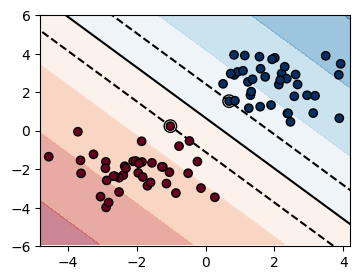

In [4]:
np.random.seed(0)
X = np.r_[np.random.randn(40, 2) - [2, 2], np.random.randn(40, 2) + [2, 2]]
#We assign the characteristic -1 to the points around (-2,-2) and 1 to the points around (2,2), this way they will be separable
Y = [-1] * 40 + [1] * 40
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X,Y)
#clf.predict([-2,-2])
#plot(clf,1)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
#Hiperplano de ecuación w[0]x_0+w[1]x_1+clf.intercept_[0]=0
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane) +
#se muestran las paralelas al hiperplano 
#que pasa por los vectores de soporte (a distancia el margen en la dirección perpendicular al hiperplano).
# esta distancia es sqrt(1+a^2) verticalmente en la segunda dimensión


margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

# plot de la recta, los puntos y los vectores más cercanos al plano 
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    cmap=plt.get_cmap("RdBu"),
)
plt.scatter(
    X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
)

plt.axis("tight")
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [5]:
#with the method predict of the class we can classificate another sample (a testing one)
clf.predict([[-2,-2]])

array([-1])

###  Caso no separable

Para extender esta idea al caso no separable, podríamos introducir, para cada elemento de nuestro conjunto de entrenamiento, una corrección $\xi_i$, de manera que la ligadura sobre la distancia se transformase en $(x_i^T\beta+\beta_0) \ge M-\xi_i$. De esta manera podríamos permitir que algunos puntos estuviesen más cerca de $\mathcal{H}$ (el hiperplano) que el margen del que hablábamos antes, o incluso podríamos permitir que estuvieran en el lado incorrecto del espacio, simplemente permitiendo $\xi_i>M$. Teniendo todo esto en cuenta, y haciendo algo de álgebra, se puede llegar al siguiente problema de optimización convexa:
$$min \|\beta\|$$ $$\text{ sujeto a }y_i(x_i^T\beta+\beta_0)\ge 1-\xi_i \ \forall i,$$ $$\xi_i\ge 0, \sum \xi_i\le K \text{ para cierto } K\in \mathbb{R}^+ $$

#### Ejemplo 

C:\Users\gonza\AppData\Local\Temp\ipykernel_5784\1786488067.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


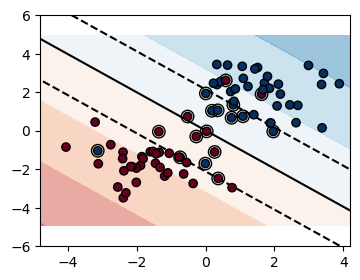

In [6]:
np.random.seed(0)
X = np.r_[np.random.randn(40, 2) - [1.5, 1.5], np.random.randn(40, 2) + [1.5, 1.5]]
#Asignamos característica -1 a los puntos alrededor de (-3/2,-3/2) y 1 alrededor de (3/2,3/2), de manera que se solapen
Y = [-1] * 40 + [1] * 40
#asignamos característica incorrecta a algunos puntos
Y[8]=1
Y[33]=1
Y[49]=-1
Y[73]=-1
clf = svm.SVC(kernel='linear', C=0.5)
clf.fit(X,Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
#Hiperplano de ecuación w[0]x_0+w[1]x_1+clf.intercept_[0]=0
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane) +
#se muestran las paralelas al hiperplano 
#que pasa por los vectores de soporte (a distancia el margen en la dirección perpendicular al hiperplano).
# esta distancia es sqrt(1+a^2) verticalmente en la segunda dimensión

margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

# plot de la recta, los puntos y los vectores más cercanos al plano 
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    cmap=plt.get_cmap("RdBu"),
)
plt.scatter(
    X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
)

plt.axis("tight")
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### Extensión a clasificación mediante fronteras no lineales

El SVC descrito hasta ahora encuentra fronteras lineales en el espacio de características de entrada. Como ocurre con otros métodos lineales, podemos flexibilizar el procedimiento ampliando el espacio de variables de entrada mediante expansiones de bases, como polinomios o splines. 

El clasificador SVM es una extensión de esta idea, en la que se permite que la dimensión del espacio ampliado sea muy grande, infinita en algunos casos. 
En algunos casos, puede ser que los cálculos se vuelvan prohibitivos. También puede ser que con suficientes funciones de base, siempre llegasemos a pensar que las clases fueran perfectamente separables, y se produciría un sobreajuste. Veamos con un ejemplo cómo evolucionan estos límites lineales al hacerlo..

#### Ejemplo de extensión de fronteras lineales a no lineales

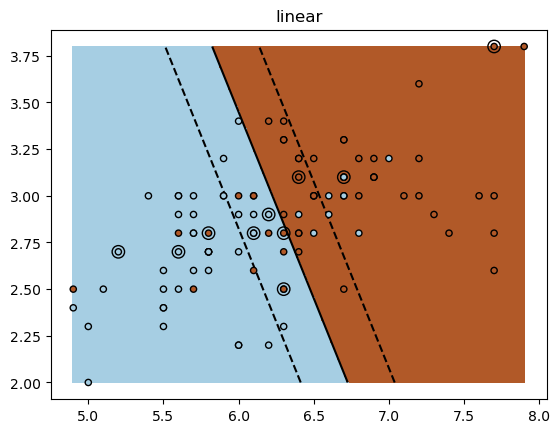

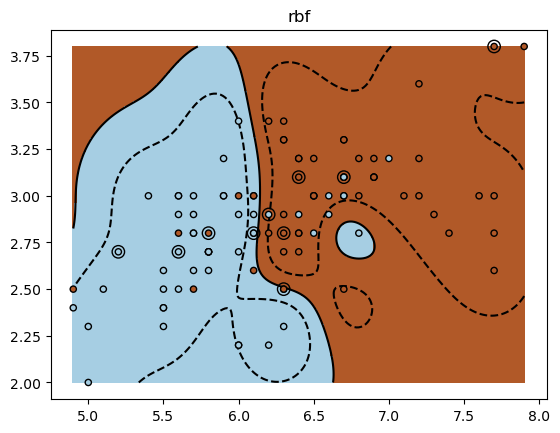

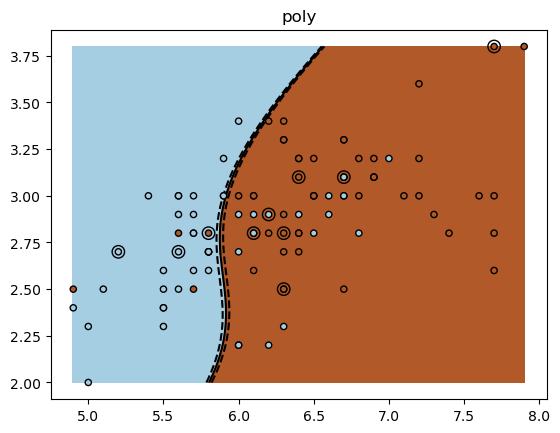

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

Bibliografía: 
- https://scikit-learn.org/stable/modules/svm.html 
- Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. New York: springer, 2009.

Ref para bibliografía en bibtex del libro:
@book{hastie2009elements,
  title={The elements of statistical learning: data mining, inference, and prediction},
  author={Hastie, Trevor and Tibshirani, Robert and Friedman, Jerome H and Friedman, Jerome H},
  volume={2},
  year={2009},
  publisher={Springer}
}
    